In [1]:
%cd ..

/home/eli/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
# pyro.enable_validation(True)
# torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='deepgen_mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch,
                        dataset_length=len(data_loader.dataset))

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-3,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 100,
    "cooldown": 100,
    "factor": 0.5,
    "verbose": True,
})

In [11]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader,
                  lr_scheduler=optimizer)

In [12]:
trainer.train()

Train Epoch: 1 [512/54000 (1%)] Loss: 863.543030
Train Epoch: 1 [11776/54000 (22%)] Loss: -87.482849
Train Epoch: 1 [23040/54000 (43%)] Loss: 31.678562
Train Epoch: 1 [34304/54000 (64%)] Loss: -298.260376
Train Epoch: 1 [45568/54000 (84%)] Loss: -286.645813
    epoch          : 1
    loss           : -101.67118227363812
    val_loss       : -397.88366718671404
    val_log_likelihood: 495.1394700720759
    val_log_marginal: 479.88702309598204
Train Epoch: 2 [512/54000 (1%)] Loss: -421.185669
Train Epoch: 2 [11776/54000 (22%)] Loss: -388.619141
Train Epoch: 2 [23040/54000 (43%)] Loss: -49.080067
Train Epoch: 2 [34304/54000 (64%)] Loss: -448.061340
Train Epoch: 2 [45568/54000 (84%)] Loss: -495.716949
    epoch          : 2
    loss           : -442.9320887197362
    val_loss       : -474.81303116515056
    val_log_likelihood: 561.3179489362358
    val_log_marginal: 544.5813177807976
Train Epoch: 3 [512/54000 (1%)] Loss: -868.107239
Train Epoch: 3 [11776/54000 (22%)] Loss: -454.474731
Trai

In [13]:
model.cpu()

DeepGenerativeOperadicModel(
  (_operad): FreeOperad(
    (generator_0): DensityDecoder(
      (distribution): DiagonalGaussian()
      (neural_layers): Sequential(
        (0): Linear(in_features=16, out_features=24, bias=True)
        (1): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
        (3): Linear(in_features=24, out_features=24, bias=True)
        (4): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
        (5): PReLU(num_parameters=1)
        (6): Linear(in_features=24, out_features=64, bias=True)
      )
    )
    (generator_1): DensityDecoder(
      (distribution): DiagonalGaussian()
      (neural_layers): Sequential(
        (0): Linear(in_features=16, out_features=40, bias=True)
        (1): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
        (2): PReLU(num_parameters=1)
        (3): Linear(in_features=40, out_features=40, bias=True)
        (4): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
        (5): PR

In [14]:
import matplotlib.pyplot as plt

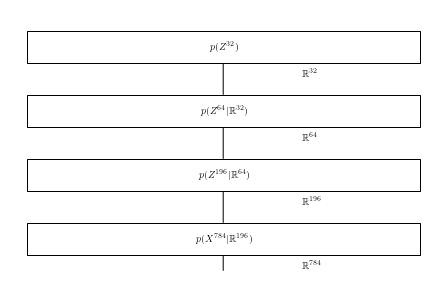

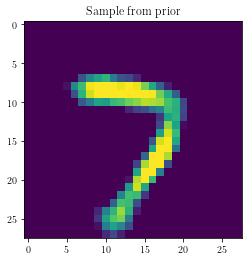

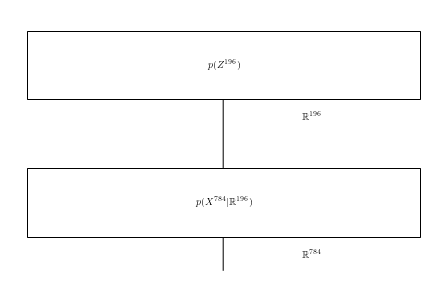

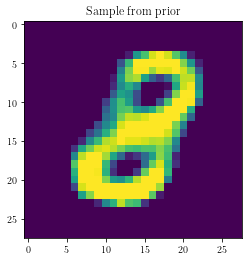

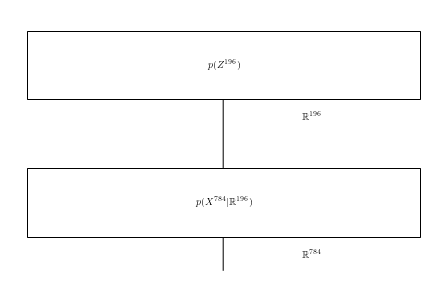

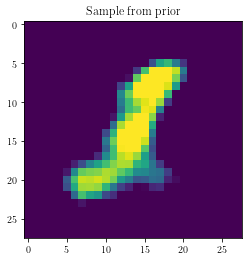

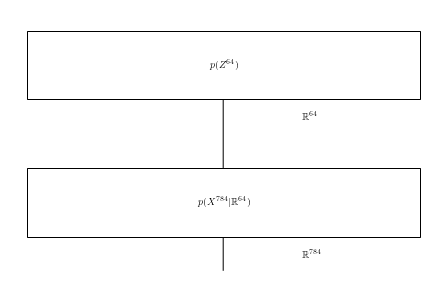

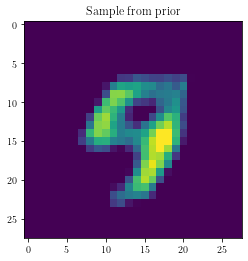

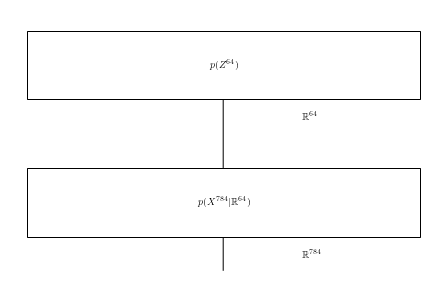

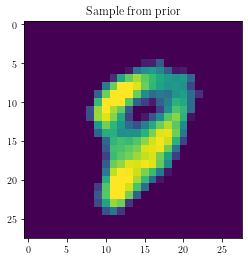

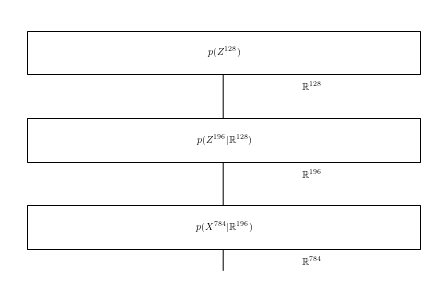

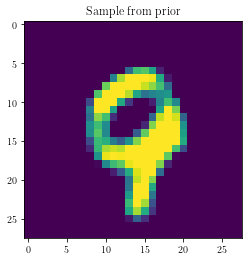

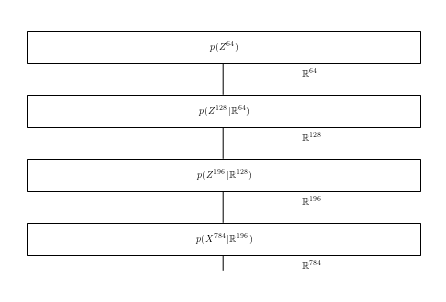

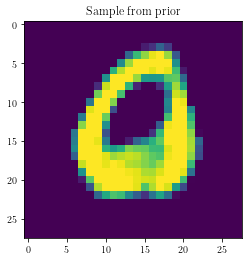

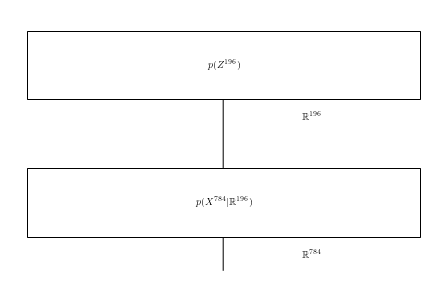

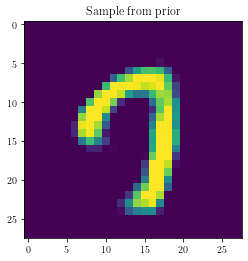

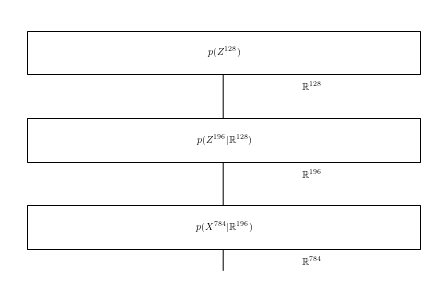

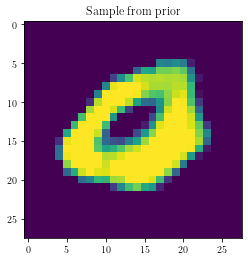

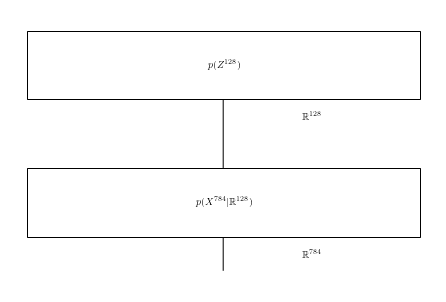

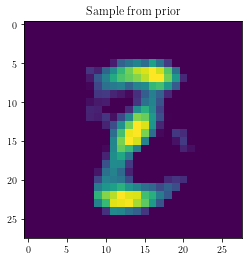

In [15]:
for k in range(10):
    path, sample = model(observations=None)
    sample = sample.view(28, 28).detach().cpu().numpy()
    path.draw()

    plt.title('Sample from prior')
    plt.imshow(sample)
    plt.show()